In [ ]:
! pip install pymysql

In [ ]:
import requests
import json
import pandas as pd
from sqlalchemy import create_engine

**Credentials to database connection**

In [ ]:
hostname="localhost"
dbname="financial_modeling_prep"
uname="username"
pwd="password"

**Create SQLAlchemy engine to connect to MySQL Database**

In [ ]:
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
				.format(host=hostname, db=dbname, user=uname, pw=pwd))

**Get API from financialmodelingprep.com**

In [ ]:
url = "https://financialmodelingprep.com/api/v3/historical-price-full/stock_dividend/AAPL?apikey="
r = requests.get(url)
print(r)

In [ ]:
result_HD = r.json()

**Show json data**

In [ ]:
result_HD

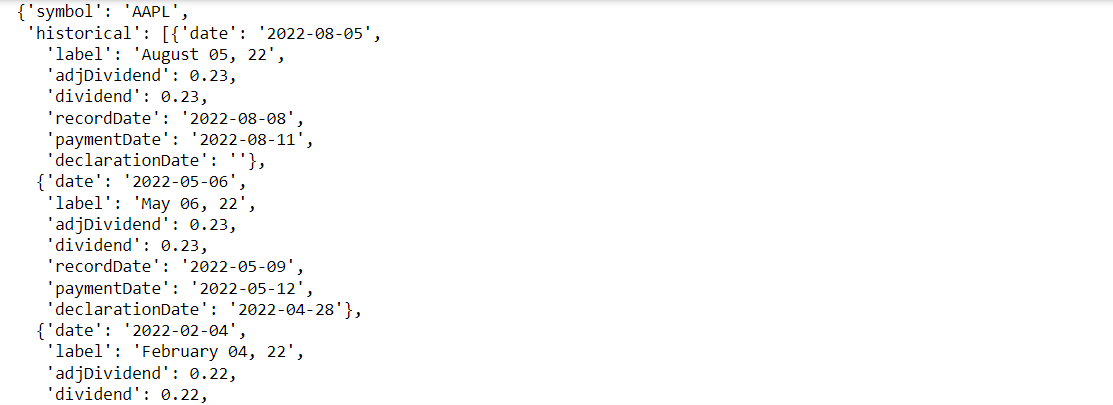

In [ ]:
print(type(result_HD))
assert isinstance(result_HD, dict)

**Using pandas dataframe for nested json file**

In [ ]:
HD_nested = pd.json_normalize(result_HD, record_path = ['historical'])
HD_nested

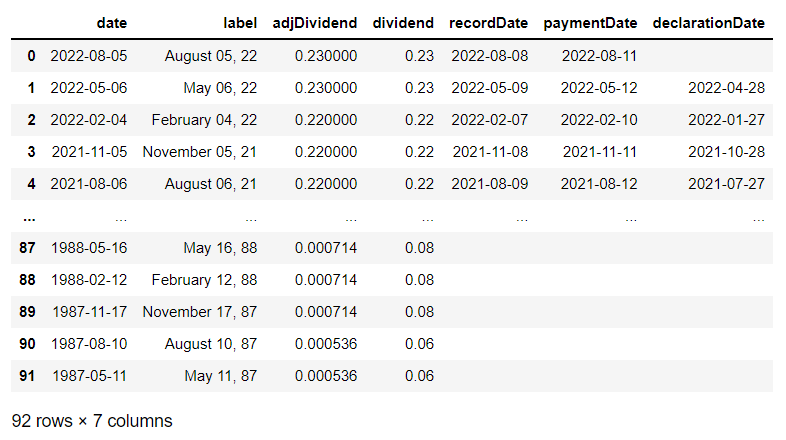

**Check types**

In [ ]:
HD_nested_type = HD_nested.dtypes
print(HD_nested_type)

In [ ]:
print(type(HD_nested))

**Convert dataframe to sql table**

In [ ]:
HD_nested.to_sql('aapl', engine, index=False)

**Check the data on MySQL Database**

Execute a simple query 

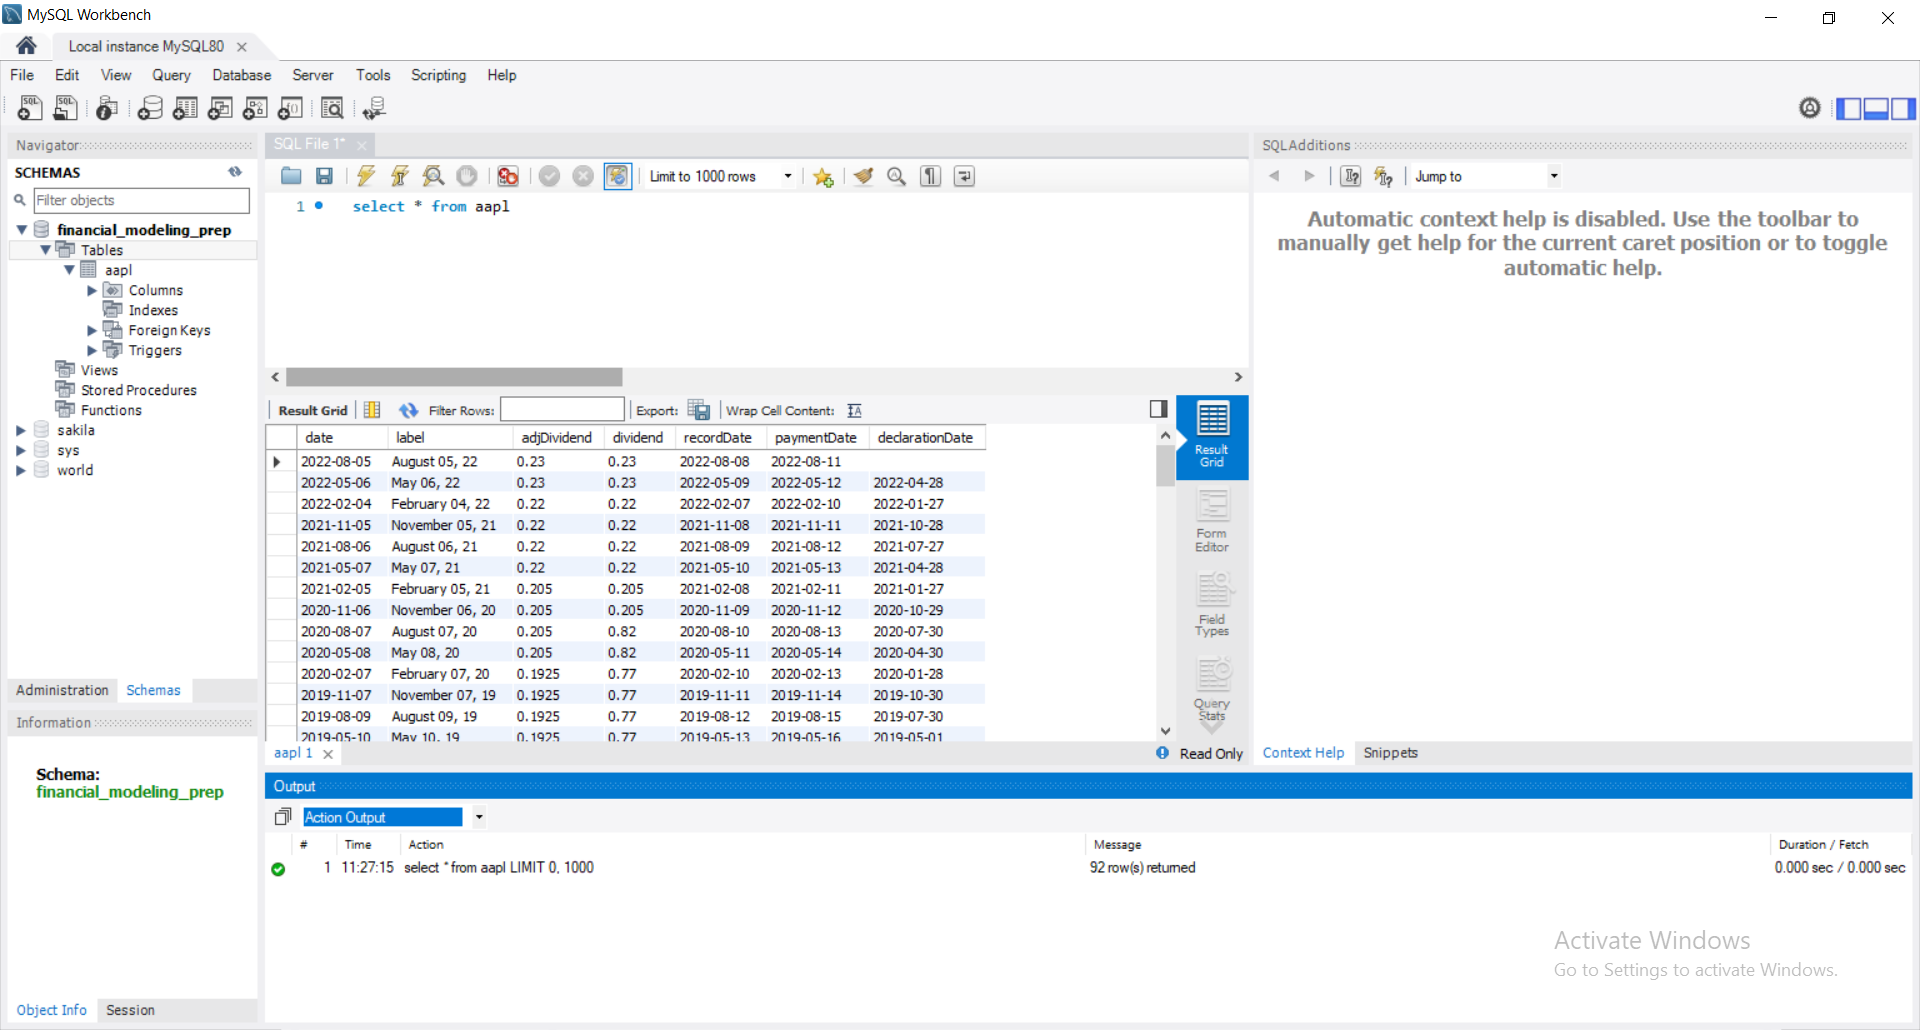